# 1. Histogram Calculation in OpenCV
Now we use cv2.calcHist() function to find the histogram. Let’s familiarize with the function and its parameters :

1.Usage:

* cv2.calcHist(src, channels, mask, histSize, ranges[, hist[, accumulate]])

2.Parameters:

* 1.src : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* 2.channels : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.
* 3.mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* 4.histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* 5.ranges : this is our RANGE. Normally, it is [0,256].

So let’s start with a sample image. Simply load an image in grayscale mode and find its full histogram.

In [1]:
import cv2
import numpy as np

path = '/Users/fanghao_w/Desktop/Py_OpenCV_Tutorial/images/cat.jpg'
img = cv2.imread(path,1)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(type(hist))
print(hist.shape)

<class 'numpy.ndarray'>
(256, 1)


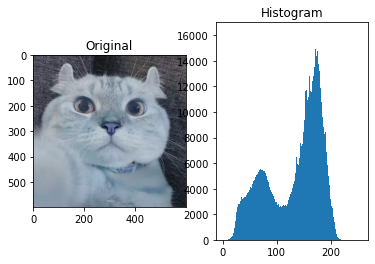

In [2]:
# Import visualization module -> matplotlib
import matplotlib.pyplot as plt

# Plot 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.hist(img.flatten(),256,[0,256]),plt.title('Histogram')
plt.show()

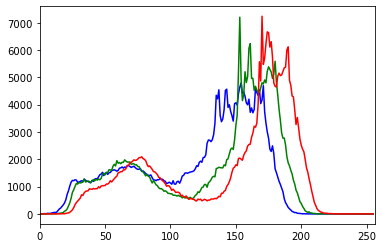

In [3]:
img = cv2.imread(path,1)
color = ('b','g','r')
for i,col in enumerate(color):
    hist_ = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist_,color = col)
    plt.xlim([0,256])
plt.show()

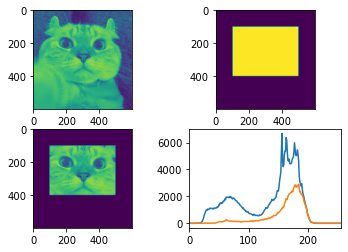

In [4]:
img = cv2.imread(path,0)

# Create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:400, 100:500] = 255
masked_img = img.copy()
masked_img[mask == 0] = 0

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

# Plot
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mask)
plt.subplot(223), plt.imshow(masked_img)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask), plt.xlim([0,256])
plt.show()